In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns 

from sklearn import datasets
from sklearn import manifold

%matplotlib inline

In [2]:
data = datasets.fetch_openml(
    "mnist_784",
    version=1,
    return_X_y=True
)
pixel_values, targets = data
targets = targets.astype(int)

In [3]:
pixel_values.shape

(70000, 784)

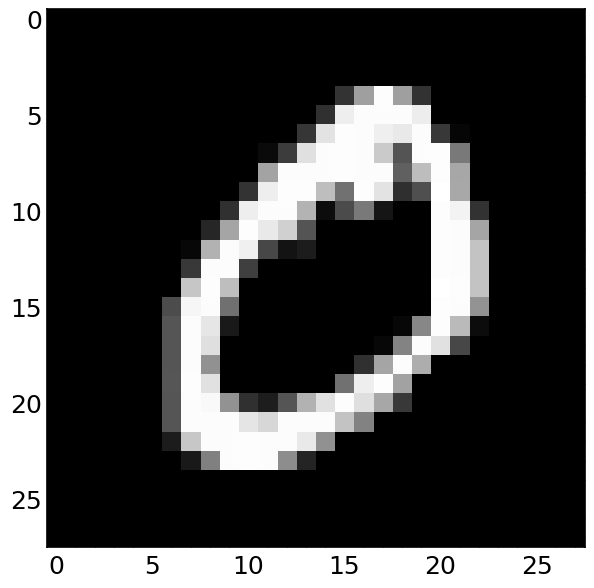

In [4]:
single_image = pixel_values[1, :].reshape(-1, 28)
plt.imshow(single_image, cmap="gray")

In [5]:
# t-SNE: t-distributed stochastic neighbor embedding
# similar value for dimensionality reduction from 784 ---> 2

tsne = manifold.TSNE(n_components=2, random_state=42)
transformed_data = tsne.fit_transform(pixel_values[:3000, :])

In [6]:
transformed_data.shape

(3000, 2)

In [8]:
tsne_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5.0
1,-26.105896,-68.069321,0.0
2,-42.503582,35.580391,4.0
3,38.893967,26.663395,1.0
4,-14.770573,35.433247,9.0


In [10]:
tsne_df.loc[:, "targets"] = tsne_df.targets.astype(int)
tsne_df.head()

,x,y,targets
0,-5.281551,-28.952768,5
1,-26.105896,-68.069321,0
2,-42.503582,35.580391,4
3,38.893967,26.663395,1
4,-14.770573,35.433247,9


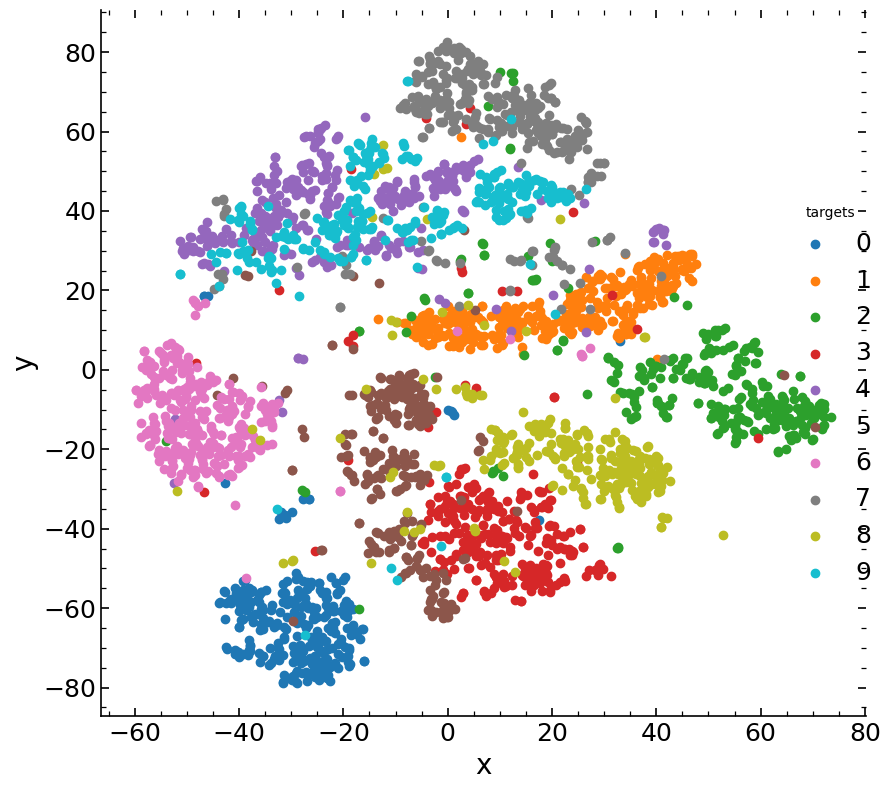

In [12]:
grid = sns.FacetGrid(tsne_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

In [14]:
from sklearn.decomposition import  PCA

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(pixel_values[:3000, :])
transformed_data.shape

(3000, 2)

In [16]:
pca_df = pd.DataFrame(
    np.column_stack((transformed_data, targets[:3000])),
    columns=["x", "y", "targets"]
)
pca_df.head()

,x,y,targets
0,163.266558,346.441347,5.0
1,1077.731244,389.649311,0.0
2,-75.702505,-416.939156,4.0
3,-909.504516,617.929068,1.0
4,-344.804114,-716.559929,9.0


In [17]:
pca_df.loc[:, "targets"] = pca_df.targets.astype(int)
pca_df.head()

,x,y,targets
0,163.266558,346.441347,5
1,1077.731244,389.649311,0
2,-75.702505,-416.939156,4
3,-909.504516,617.929068,1
4,-344.804114,-716.559929,9


/Users/ychu/miniconda3/envs/aaamlp/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


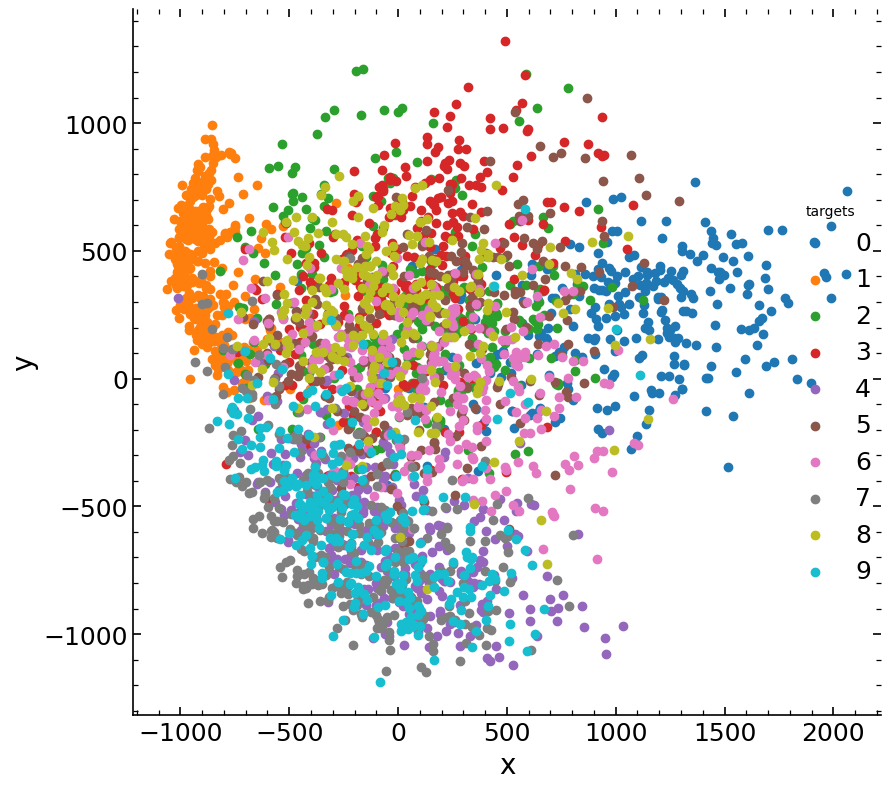

In [18]:
grid = sns.FacetGrid(pca_df, hue="targets", size=8)
grid.map(plt.scatter, "x", "y").add_legend()

### on this problem, t-SNE is much better than PCA regarding dimensionality reduction or clustering

### kaggle --- winequality_red challenge
#### url: https://www.kaggle.com/datasets/sh6147782/winequalityred/data

In [21]:
df = pd.read_csv("./datasets/kaggle_redwine/winequality-red.csv")
print(df.shape)
df.head()

(1596, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [25]:
df.quality.value_counts().sort_index()

3     10
4     52
5    680
6    637
7    199
8     18
Name: quality, dtype: int64

In [26]:
quality_mapping = {
    3:0,
    4:1,
    5:2,
    6:3,
    7:4,
    8:5
}

df.loc[:, "quality"] = df.quality.map(quality_mapping)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


In [28]:
df.quality.value_counts().sort_index()

0     10
1     52
2    680
3    637
4    199
5     18
Name: quality, dtype: int64

In [29]:
df.shape

(1596, 12)

In [30]:
df = df.sample(frac=1).reset_index(drop=True)

df_train = df.head(1000)
print(df_train.shape)

df_test = df.tail(599)
df_test.shape

(1000, 12)


(599, 12)

In [31]:
# decision tree model

from sklearn import tree
from sklearn import metrics

In [32]:
clf = tree.DecisionTreeClassifier(max_depth=3)

cols = [i for i in df.columns if i != "quality"]
print(cols)

clf.fit(df_train[cols], df_train.quality)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


DecisionTreeClassifier(max_depth=3)

In [33]:
# test performance

train_predictions = clf.predict(df_train[cols])
test_predictions = clf.predict(df_test[cols])

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
print("train accuracy", train_accuracy)

test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)
print("test accuracy", test_accuracy)

train accuracy 0.606
test accuracy 0.5642737896494157


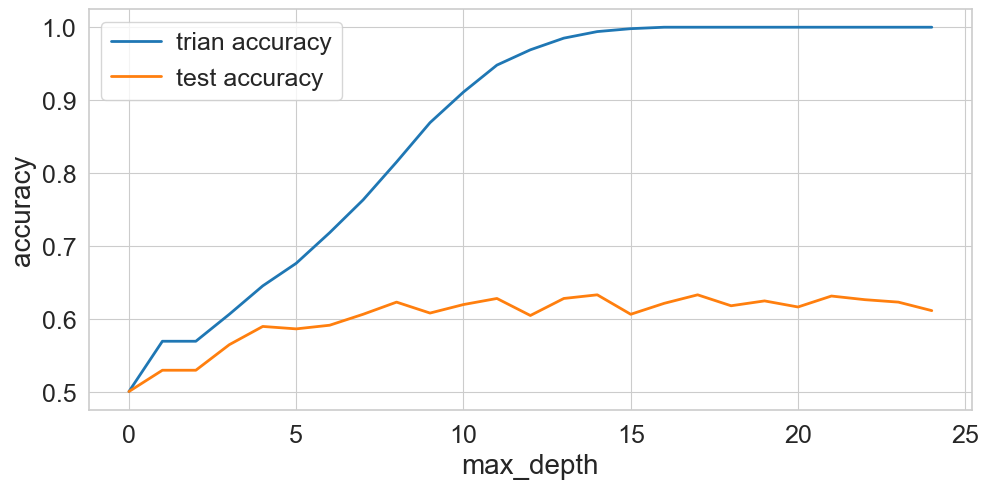

In [35]:
# test hyperparameters to optimize the model

train_accuracies = [0.5]
test_accuracies = [0.5]
for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    cols = [i for i in df.columns if i != "quality"]
    clf.fit(df_train[cols], df_train.quality)

    train_predictions = clf.predict(df_train[cols])
    test_predictions = clf.predict(df_test[cols])

    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy  = metrics.accuracy_score(df_test.quality, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="trian accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend()
plt.xticks(range(0,26, 5))
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.show()
plt.close()

### overfitting: occurs when the train loss keeps improving but the test loss starts getting worse

### cross-validation: actions to avoid overfitting and improve the generalizable of the model (acting on the training data)
1. k-fold cross-validation
2. stratified k-fold cross-validation
3. hold-out based validation
4. leave-one-out cross-validation
5. group k-fold cross-validation

In [36]:
from sklearn import  model_selection

In [37]:
# k-fold cross validation

df_kfold = df.copy()
df_kfold["kfold"] = -1
df_kfold = df_kfold.sample(frac=1).reset_index(drop=True)

kf = model_selection.KFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_kfold)):
    df_kfold.loc[val_, "kfold"] = fold

df_kfold

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,9.9,0.40,0.53,6.70,0.097,6.0,19.0,0.99860,3.27,0.82,11.7,4,0
1,12.2,0.48,0.54,2.60,0.085,19.0,64.0,1.00000,3.10,0.61,10.5,3,0
2,9.3,0.39,0.44,2.10,0.107,34.0,125.0,0.99780,3.14,1.22,9.5,2,0
3,9.6,0.33,0.52,2.20,0.074,13.0,25.0,0.99509,3.36,0.76,12.4,4,0
4,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.99800,3.33,0.54,9.8,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.1,0.32,0.25,2.30,0.071,23.0,58.0,0.99633,3.42,0.97,10.6,2,4
1592,6.3,0.51,0.13,2.30,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,3,4
1593,7.1,0.53,0.07,1.70,0.071,15.0,24.0,0.99510,3.29,0.66,10.8,3,4
1594,8.1,0.72,0.09,2.80,0.084,18.0,49.0,0.99940,3.43,0.72,11.1,3,4


In [41]:
# stratified k-fold cross validation

df_skfold = df.copy()
df_skfold["kfold"] = -1
df_skfold = df_skfold.sample(frac=1).reset_index(drop=True)

y = df_skfold.quality.values
kf = model_selection.StratifiedKFold(n_splits=5)
for fold, (trn_, val_) in enumerate(kf.split(X=df_skfold, y=y)):
    df_skfold.loc[val_, "kfold"] = fold

df_skfold

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,kfold
0,8.2,0.330,0.32,2.80,0.067,4.0,12.0,0.99473,3.30,0.76,12.8,4,0
1,11.8,0.330,0.49,3.40,0.093,54.0,80.0,1.00020,3.30,0.76,10.7,4,0
2,7.8,0.460,0.26,1.90,0.088,23.0,53.0,0.99810,3.43,0.74,9.2,3,0
3,8.9,0.595,0.41,7.90,0.086,30.0,109.0,0.99980,3.27,0.57,9.3,2,0
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1591,6.9,0.520,0.25,2.60,0.081,10.0,37.0,0.99685,3.46,0.50,11.0,2,4
1592,7.4,0.290,0.38,1.70,0.062,9.0,30.0,0.99680,3.41,0.53,9.5,3,4
1593,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,4,4
1594,6.6,0.700,0.08,2.60,0.106,14.0,27.0,0.99665,3.44,0.58,10.2,2,4


In [42]:
df_skfold.quality[df_skfold.kfold == 2].value_counts()

2    136
3    127
4     40
1     11
5      3
0      2
Name: quality, dtype: int64

In [43]:
df_skfold.quality[df_skfold.kfold == 4].value_counts()

2    136
3    128
4     39
1     10
5      4
0      2
Name: quality, dtype: int64

#### note: stratified K-fold will keep the original target ratios in each fold

Text(0, 0.5, 'count')

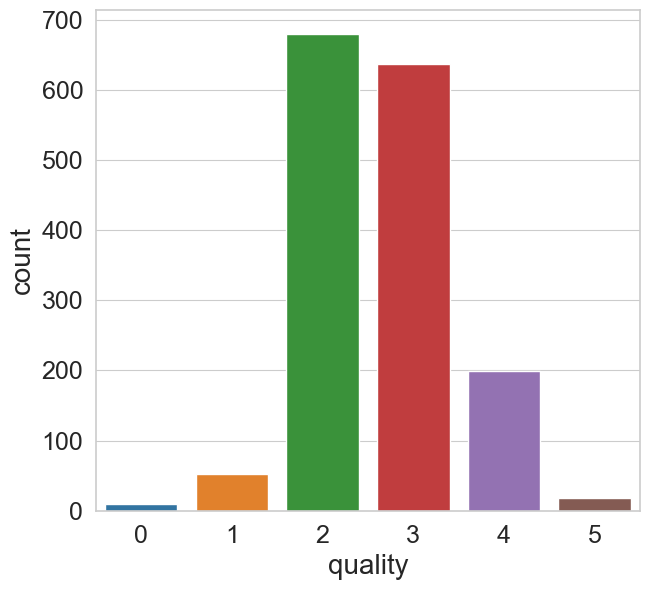

In [44]:
b = sns.countplot(x="quality", data=df)
b.set_xlabel("quality")
b.set_ylabel("count")

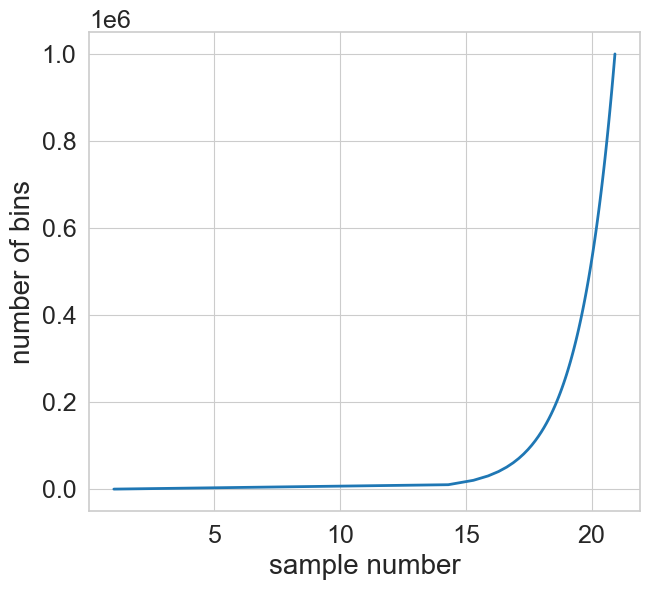

In [49]:
# Sturge's Rule

sample = np.linspace(1, 1000000, 100)
num_bins = 1 + np.log2(sample)
plt.plot(num_bins, sample, "-")
plt.xlabel("sample number")
plt.ylabel("number of bins")
plt.show()

In [50]:
# stratified cross-validation for regression problem
# creating groups by classifying target into bins

def create_folds(data: pd.DataFrame):
    data["kfold"] = -1
    data = data.sample(frac=1).reset_index(drop=True)

    num_bins = int(np.floor(1 + np.log2(len(data))))
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )

    kf = model_selection.StratifiedKFold(n_splits=5)
    for f, (t_, v_) in enumerate(kf.split(X=data, y=data.bins.values)):
        data.loc[v_, "kfold"] = f 
    
    data = data.drop("bins", axis=1)
    return data 

if __name__ == "__main__":
    X, y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )

    df = pd.DataFrame(
        X,
        columns=[f"f_{i}" for i in range(X.shape[1])]
    )
    df.loc[:, "target"] = y 

    df = create_folds(df)

/Users/ychu/miniconda3/envs/aaamlp/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


## evaluation metrics

### classification metrics
- accuracy
- precision (P)
- recall (R)
- F1 score
- area under the ROC (receiver operating characteristic) curve (AUC)
- log loss
- precision at k (P@k)
- average precision at k (AP@k)
- mean average precision at k (MAP@k)

### regression metrics
- mean absolute error (MAE)
- mean squared error (MSE)
- root mean squared error (RMSE)
- root mean squared logarithmic error (RMSLE)
- mean percentage error (MPE)
- mean absolute percentage error (MAPE)
- $R^2$

#### tip: for a classification problem, if the dataset target is even, then we can generally use accuracy, precision, recall, or F1

In [51]:
def accuracy(y_true, y_pred):
    correct_counter = 0
    for yt, yp in zip(y_true, y_pred):
        if yt == yp:
            correct_counter += 1
    return correct_counter/len(y_true)

In [52]:
from sklearn import  metrics
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
metrics.accuracy_score(l1, l2)

0.625

#### precision concepts
1. True Positive (TP): if a positive class predicted as positive
2. True Negative (TN): if a negative class predicted as negative
3. False Positive (FP): if a negative class predicted as positive
4. False Negative (FN): if a positive class predicted as negative

In [53]:
def true_positive(y_true, y_pred):
    tp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt==1 and yp==1:
            tp += 1
    return tp

def true_negative(y_true, y_pred):
    tn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt==0 and yp==0:
            tn += 1
    return tn 

def false_positive(y_true, y_pred):
    fp = 0
    for yt, yp in zip(y_true, y_pred):
        if yt==0 and yp==1:
            fp += 1
    return fp

def false_negative(y_true, y_pred):
    fn = 0
    for yt, yp in zip(y_true, y_pred):
        if yt==1 and yp==0:
            fn += 1
    return fn 

In [54]:
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]

print(true_positive(l1, l2)) # 2
print(true_negative(l1, l2)) # 3
print(false_positive(l1, l2)) # 1
print(false_negative(l1, l2)) # 2

2
3
1
2


#### accuracy score = (TP+TN)/(TP+TN+FP+FN)
#### precision = TP / (TP + FP) (successful rate on the predicted positive class)
#### recall = TP / (TP + FN) (successful rate on the original positive class)

In [57]:
def precision(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fp = false_positive(y_true, y_pred)
    precision = tp / (tp+fp)
    return precision
precision(l1, l2)

0.6666666666666666

In [58]:
def recall(y_true, y_pred):
    tp = true_positive(y_true, y_pred)
    fn = false_negative(y_true, y_pred)
    recall = tp / (tp + fn)
    return recall
recall(l1, l2)

0.5

In [59]:
y_true = [0,0,0,1,0,0,0,0,0,0,
          1,0,0,0,0,0,0,0,1,0]
y_pred = np.random.random(len(y_true))
y_pred

array([0.76210921, 0.23828003, 0.10896359, 0.50724917, 0.63120491,
       0.75271113, 0.73745588, 0.1909918 , 0.97096151, 0.01730729,
       0.74036143, 0.20838625, 0.40343278, 0.20500853, 0.6019205 ,
       0.78348972, 0.13210087, 0.29873628, 0.23707533, 0.78192301])

[ 0.66210921  0.13828003  0.00896359  0.40724917  0.53120491  0.65271113
  0.63745588  0.0909918   0.87096151 -0.08269271  0.64036143  0.10838625
  0.30343278  0.10500853  0.5019205   0.68348972  0.03210087  0.19873628
  0.13707533  0.68192301]


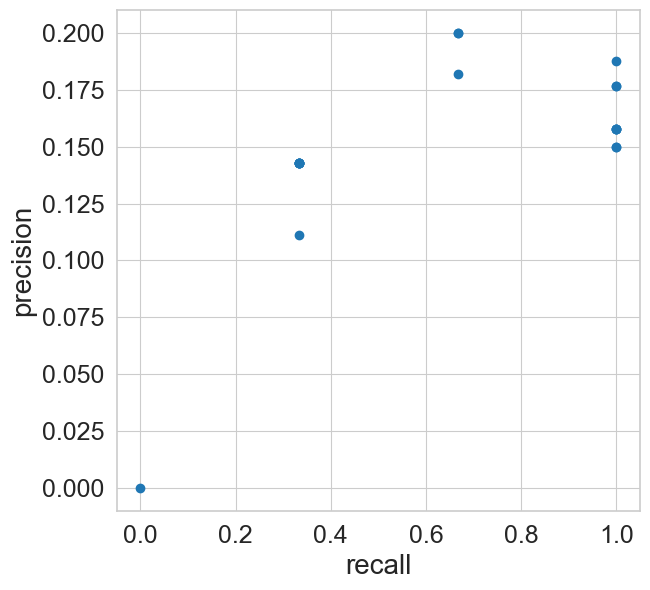

In [68]:
precisions = []
recalls = []
thresholds = y_pred - 0.1
print(thresholds)
for i in thresholds:
    temp_prediction = [1 if x>=i else 0 for x in y_pred]
    p = precision(y_true, temp_prediction)
    r = recall(y_true, temp_prediction)
    precisions.append(p)
    recalls.append(r)

plt.plot(recalls, precisions, 'o')
plt.xlabel("recall")
plt.ylabel("precision")
plt.show()
plt.close()

#### F1 score = 2PR / (P+R) (P: precision; R: recall)
#### F1 score = 2TP / (2TP + FP + FN)

In [69]:
def f1(y_true, y_pred):
    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    f1 = 2 * p * r / (p + r)
    return f1 
f1(l1, l2)

0.5714285714285715

In [70]:
metrics.f1_score(l1, l2)

0.5714285714285715

#### true positive rate (TPR): successful rate of predicting original positive as positive (recall)
### TPR = recall = TP / (TP + FN) = sensitivity

In [74]:
def tpr(y_true, y_pred):
    return recall(y_true, y_pred)
tpr(l1, l2)

0.5

#### false positive rate (FPR): failure rate of predicting original negative as positive
#### FPR = FP / (FP + TN)
#### 1 - FPR: specificity

In [73]:
def fpr(y_true, y_pred):
    fp = false_positive(y_true, y_pred)
    tn = true_negative(y_true, y_pred)
    return fp / (fp + tn)
fpr(l1, l2)

0.25

In [83]:
y_true = [0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05, 0.9, 0.5, 0.3, 0.66, 0.3, 0.2, 0.85, 0.15, 0.99]

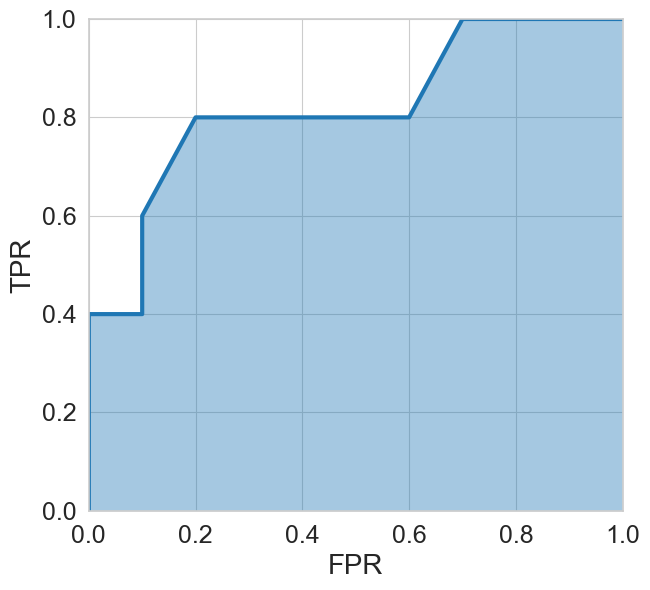

In [84]:
tpr_list = []
fpr_list = []
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0]
for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    tpr_list.append(tpr(y_true, temp_pred))
    fpr_list.append(fpr(y_true, temp_pred))

plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
plt.close()

In [85]:
print(len(y_true))
print(len(y_pred))
metrics.roc_auc_score(y_true, y_pred)

15
15


0.8300000000000001

#### log loss = $-[target * \log(prediction) + (1-target) * \log(1 - prediction)]$

In [86]:
def log_loss(y_true, y_proba):
    epsilon = 1e-15
    loss = []
    for yt, yp in zip(y_true, y_proba):
        yp = np.clip(yp, epsilon, 1-epsilon)
        tmp_loss = -1.0 * (
            yt * np.log(yp) + (1-yt) * np.log(1-yp)
        )
        loss.append(tmp_loss)
    return np.mean(loss)
log_loss(y_true, y_pred)

0.49882711861432294

In [87]:
metrics.log_loss(y_true, y_pred)

0.49882711861432294

In [89]:
def macro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    precision = 0 # TP / (TP + FP)
    for class_ in range(num_classes):
        temp_true = [1 if p==class_ else 0 for p in y_true]
        temp_pred = [1 if p==class_ else 0 for p in y_pred]

        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp / (tp + fp)
        precision += temp_precision
    precision /= num_classes
    return precision

In [90]:
def micro_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))

    tp = 0
    fp = 0
    for class_ in range(num_classes):
        temp_true = [1 if p==class_ else 0 for p in y_true]
        temp_pred = [1 if p==class_ else 0 for p in y_pred]

        tp += true_positive(temp_true, temp_pred)
        fp += false_positive(temp_true, temp_pred)
    precision = tp / (tp + fp)
    return precision

In [91]:
from collections import  Counter
def weighted_precision(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    class_counts = Counter(y_true)

    precision = 0
    for class_ in range(num_classes):
        temp_true = [1 if p==class_ else 0 for p in y_true]
        temp_pred = [1 if p==class_ else 0 for p in y_pred]
        tp = true_positive(temp_true, temp_pred)
        fp = false_positive(temp_true, temp_pred)
        temp_precision = tp / (tp + fp)

        weighted_precision = class_counts[class_] * temp_precision
        precision += weighted_precision
    overall_precision = precision / len(y_true)
    return overall_precision

In [92]:
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

print(macro_precision(y_true, y_pred))
metrics.precision_score(y_true, y_pred, average="macro")

0.3611111111111111


0.3611111111111111

In [93]:
print(micro_precision(y_true, y_pred))
metrics.precision_score(y_true, y_pred, average="micro")

0.4444444444444444


0.4444444444444444

In [94]:
print(weighted_precision(y_true, y_pred))
metrics.precision_score(y_true, y_pred, average="weighted")

0.39814814814814814


0.39814814814814814

Text(0.5, 39.44444444444444, 'predicted labels')

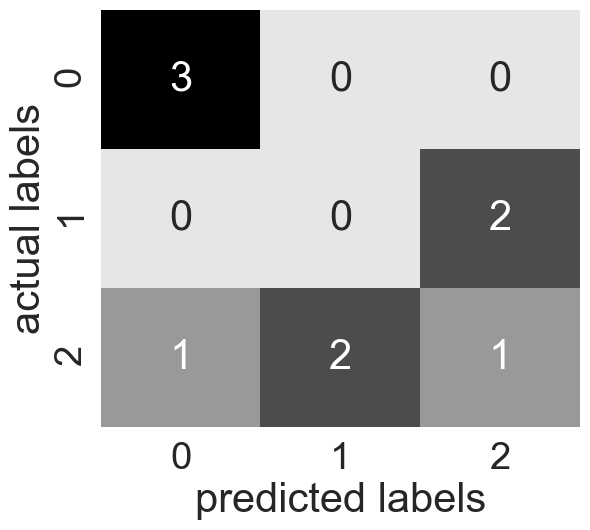

In [95]:
# plot confusion matrix

cm = metrics.confusion_matrix(y_true, y_pred)
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel("actual labels")
plt.xlabel("predicted labels")